In [192]:
'''
You may need to run this cell the first time that you work with the code provided here. 
Uncomment the following line and run it.
After the first time you run it, you should not have to run it again.
You may have to restart Jupyter after installing to get everything up and running
'''

# %pip install wordcloud

'\nYou may need to run this cell the first time that you work with the code provided here. \nUncomment the following line and run it.\nAfter the first time you run it, you should not have to run it again.\nYou may have to restart Jupyter after installing to get everything up and running\n'

In [193]:
#Run this cellblock to import all the necessary libraries and packages for the code.
import re
import string
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#from google.colab import files
import io

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sethc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sethc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sethc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sethc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sethc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [194]:
# ========================================================
# PART 0: CREATE FUNCTIONS TO UPLOAD AND LOAD TEXT DATA
# ========================================================

# Function to load a CSV file (works in any Python environment)
def load_csv(file_path=None):
    """
    Load a CSV file from a file path and return a pandas DataFrame
    
    Parameters:
    file_path (str, optional): Path to the CSV file. If None, will prompt user.
    
    Returns:
    DataFrame: The loaded pandas DataFrame
    """
    # Try to load the CSV from the file path
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded '{file_path}' with {df.shape[0]} rows and {df.shape[1]} columns.")
        
        # Display the first few rows to check the data
        print("\nPreview of your data:")
        print(df.head())
        
        # Display column names
        print("\nColumn names (you'll need these to select text columns):")
        for i, col in enumerate(df.columns):
            print(f"{i}: {col}")
            
        return df
    
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None

# Function to extract text from a dataframe
def extract_text_from_df(df, column_name, rows=None):
    """
    Extract text from a specific column in the dataframe
    
    Parameters:
    df (DataFrame): The pandas DataFrame
    column_name (str): The name of the column containing text
    rows (list or None): List of row indices to include, or None for all rows
    
    Returns:
    str: Combined text from the specified column
    """
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the dataframe.")
        print(f"Available columns are: {', '.join(df.columns)}")
        return ""
    
    if rows is None:
        # Use all rows if not specified
        selected_data = df[column_name]
    else:
        # Use only specified rows
        selected_data = df.loc[rows, column_name]
    
    # Filter out nan values and convert to string
    text_data = [str(text) for text in selected_data if not pd.isna(text)]
    
    # Combine all text with newlines in between
    combined_text = "\n".join(text_data)
    
    print(f"Extracted {len(text_data)} text entries from column '{column_name}'")
    print(f"Total length: {len(combined_text)} characters")
    
    return combined_text

In [195]:
# ========================================================
# PART 0: YOU UPLOAD AND LOAD TEXT DATA
# ========================================================

# Replace with your file path or run without arguments for prompt
df = load_csv('tweet_data.csv')  


if df is not None:
    text_column_name = 'tweet' # Replaced ??? with the name of the column containing the text data (tweets) we are analyzing.
    sample_text = extract_text_from_df(df, text_column_name)

Successfully loaded 'tweet_data.csv' with 3467 rows and 2 columns.

Preview of your data:
                                               tweet      label
0  The only thing I got from college is a caffein...  sarcastic
1  I love it when professors draw a big question ...  sarcastic
2  Remember the hundred emails from companies whe...  sarcastic
3  Today my pop-pop told me I was not “forced” to...  sarcastic
4  @VolphanCarol @littlewhitty @mysticalmanatee I...  sarcastic

Column names (you'll need these to select text columns):
0: tweet
1: label
Extracted 3467 text entries from column 'tweet'
Total length: 365036 characters


In [196]:
# ========================================================
# PART 1: TEXT PREPROCESSING FUNCTIONS
# ========================================================

'''
The user can change how the text output is processed (lowercase conversion, punctuation removal, number removal) by stating true or false in the functions call.
'''

# Function to clean and preprocess text
def preprocess_text(text, lowercase=True, remove_punctuation=True, remove_numbers=True):
    """
    Clean and preprocess text by:
    - Converting to lowercase (optional)
    - Removing punctuation (optional)
    - Removing numbers (optional)
    """
    # Convert to lowercase
    if lowercase:
        text = text.lower()
    
    # Remove punctuation
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    if remove_numbers:
        text = re.sub(r'\d+', '', text)
    
    return text

In [197]:
# ========================================================
# PART 1: TEXT PREPROCESSING EXPLORATION
# ========================================================

'''
This code takes the sample text column (which we had extracted from the csv file's 'tweet' column) and processed it to make it all lowercase text, removed punctuation and numbers. 
'''
from pickle import FALSE, TRUE


preprocessed_text = preprocess_text(
    sample_text, 
    lowercase=True,        
    remove_punctuation=True,   
    remove_numbers=True        
)

print("--- Preprocessed Text ---")
print(preprocessed_text[:500] + "...")  # Print first 500 characters

--- Preprocessed Text ---
the only thing i got from college is a caffeine addiction
i love it when professors draw a big question mark next to my answer on an exam because i’m always like yeah i don’t either ¯ツ¯
remember the hundred emails from companies when covid started getting real i’ve gotten three in regards to support for protests and only savagexfenty shared helpful links and actually said black lives matter we love capitalism 🥰🙌🏼
today my poppop told me i was not “forced” to go to college 🙃 okay sure sureeee
vol...


In [198]:
# ========================================================
# PART 2: TOKENIZATION FUNCTIONS
# ========================================================

# Function to tokenize text into sentences and words
def tokenize_text(text):
    """
    Split text into sentences and words
    """
    # Tokenize into sentences
    sentences = sent_tokenize(text)
    
    # Tokenize into words
    words = word_tokenize(text)
    
    return sentences, words

In [199]:
# ========================================================
# PART 2: TOKENIZATION EXPLORATION
# ========================================================

'''
This is the codes results with various settings of the prepocessed function.

LOWC. | PUNCT.| NUMB. || SENTENCES | WORDS |
===========================================|
TRUE  | TRUE  | TRUE  || 1         | 67120 |
-------------------------------------------|
TRUE  | TRUE  | FALSE || 1         | 67693 |
TRUE  | FALSE | TRUE  || 2762      | 76004 |
FALSE | TRUE  | TRUE  || 1         | 67120 |
-------------------------------------------|
FALSE | FALSE | TRUE  || 2787      | 76009 |
FALSE | TRUE  | FALSE || 1         | 67693 |
TRUE  | FALSE | FALSE || 2712      | 76462 |
-------------------------------------------|
FALSE | FALSE | FALSE || 2762      | 76492 |
-------------------------------------------|

It seems that the most effective way to tokenize the text is to keep the punctuation, keep the numbers, and set the text to be lowercase, or keep it as lowercase. I assume that we would want to retain more information in the text by not removing the numbers. If we did not care about any possible numerical values, we would want to remove numbers, remove capitalization, but keep punctuation. (so, in summary, TRUE FALSE FALSE, or TRUE FALSE TRUE.) 

Removing the punctuation is the worst thing you can do to accurately parse the text into sentences. The function interprets every tweet as a singular, very long sentence.

For the later part of the assignment, I changed it to be TRUE TRUE TRUE. I did this so that the first few things in the bar graph were not symbols.
'''

sentences, words = tokenize_text(preprocessed_text)

print(f"\n--- Text Tokenization ---")
print(f"Number of sentences: {len(sentences)}")
print(f"Number of words: {len(words)}")
print(f"\nFirst 3 sentences:")
for i, sentence in enumerate(sentences[:3]):
    print(f"  {i+1}. {sentence}")

print(f"\nFirst 20 words:")
print(words[:20])


--- Text Tokenization ---
Number of sentences: 1
Number of words: 67120

First 3 sentences:
  1. the only thing i got from college is a caffeine addiction
i love it when professors draw a big question mark next to my answer on an exam because i’m always like yeah i don’t either ¯ツ¯
remember the hundred emails from companies when covid started getting real i’ve gotten three in regards to support for protests and only savagexfenty shared helpful links and actually said black lives matter we love capitalism 🥰🙌🏼
today my poppop told me i was not “forced” to go to college 🙃 okay sure sureeee
volphancarol littlewhitty mysticalmanatee i did too and i also reported cancun cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to mexico
jimrossignol i choose to interpret it as xd the universal emoticon for laughing at those poor poor folks in ubisofts marketing department who have to deal with that branding until the servers quietly shut down  month

In [200]:
# ========================================================
# PART 3: STOPWORD REMOVAL FUNCTION
# ========================================================


def remove_stopwords(word_list, custom_stopwords=None):
    """
    Remove common stopwords from a list of words
    """
    # Get standard English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Add custom stopwords if provided
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    
    # Remove stopwords
    filtered_words = [word for word in word_list if word not in stop_words]
    
    return filtered_words

In [201]:
# ========================================================
# PART 3: STOPWORD REMOVAL EXPLORATION
# ========================================================

'''
Google says:
In NLP, stop words are inconsequential words with little value in helping processors answer queries. The specific stop words can vary based on context.

I added words that are often used as slang or 'brain rot' words I would expect to see in tweets that do not add much information.

Adding the words to the list of stopwords increased the number of words removed from 30595 to 30904 words.
'''

custom_stopwords = ['like','bruh', 'slay', 'sure'] # Brain rot words I thought would be good to remove


filtered_words = remove_stopwords(words, custom_stopwords)

print(f"\n--- After Stopword Removal ---")
print(f"Original word count: {len(words)}")
print(f"Filtered word count: {len(filtered_words)}")
print(f"Removed {len(words) - len(filtered_words)} stopwords")
print(f"\nFirst 20 filtered words:")
print(filtered_words[:20])


--- After Stopword Removal ---
Original word count: 67120
Filtered word count: 36756
Removed 30364 stopwords

First 20 filtered words:
['thing', 'got', 'college', 'caffeine', 'addiction', 'love', 'professors', 'draw', 'big', 'question', 'mark', 'next', 'answer', 'exam', '’', 'always', 'yeah', '’', 'either', '¯ツ¯']


In [202]:
# ========================================================
# PART 4: STEMMING AND LEMMATIZATION FUNCTION
# ========================================================

'''
No inputs necessary here, just run this code block.
'''

# Function to perform stemming and lemmatization
def stem_and_lemmatize(word_list):
    """
    Apply stemming and lemmatization to a list of words
    """
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    stemmed_words = [stemmer.stem(word) for word in word_list]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_list]
    
    return stemmed_words, lemmatized_words

In [203]:
# ========================================================
# PART 4: STEMMING AND LEMMATIZATION EXPLORATION
# ========================================================

'''
Stemming and lemimatization are two different techniques used in NLP to reduce words to their base or root form to help making machine analyzation easier to do.

Once you understand what these methods are, run the following code and look at the output.
The original, stemmed, and lemmatized words shown do not have much change from the original word. this suggest the language used in tweets are usually in simple forms.
'''

stemmed_words, lemmatized_words = stem_and_lemmatize(filtered_words)

print(f"\n--- Stemming vs Lemmatization ---")
print(f"Original word count: {len(filtered_words)}")

# Show comparison for first 10 words
print(f"\nComparison of first 10 words:")
print(f"{'Original':<15} {'Stemmed':<15} {'Lemmatized':<15}")
print("-" * 45)
for i in range(10):
    if i < len(filtered_words):
        print(f"{filtered_words[i]:<15} {stemmed_words[i]:<15} {lemmatized_words[i]:<15}")


--- Stemming vs Lemmatization ---
Original word count: 36756

Comparison of first 10 words:
Original        Stemmed         Lemmatized     
---------------------------------------------
thing           thing           thing          
got             got             got            
college         colleg          college        
caffeine        caffein         caffeine       
addiction       addict          addiction      
love            love            love           
professors      professor       professor      
draw            draw            draw           
big             big             big            
question        question        question       


In [204]:
# ========================================================
# PART 5: FREQUENCY ANALYSIS FUNCTION
# ========================================================


# Function to analyze word frequency
def analyze_frequency(word_list, n=10):
    """
    Find the most common words and plot frequency distribution
    """
    # Get frequency distribution
    fdist = FreqDist(word_list)
    
    # Get most common words
    most_common = fdist.most_common(n)
    
    # Create lists for plotting
    words_mc = [word for word, count in most_common]
    counts_mc = [count for word, count in most_common]
    
    return fdist, words_mc, counts_mc


--- Word Frequency Analysis ---
Top 15 most frequent words:
  ’: 1148
  love: 214
  get: 211
  one: 206
  time: 197
  people: 186
  im: 178
  day: 170
  really: 148
  ”: 138
  “: 136
  think: 131
  today: 129
  good: 129
  got: 124


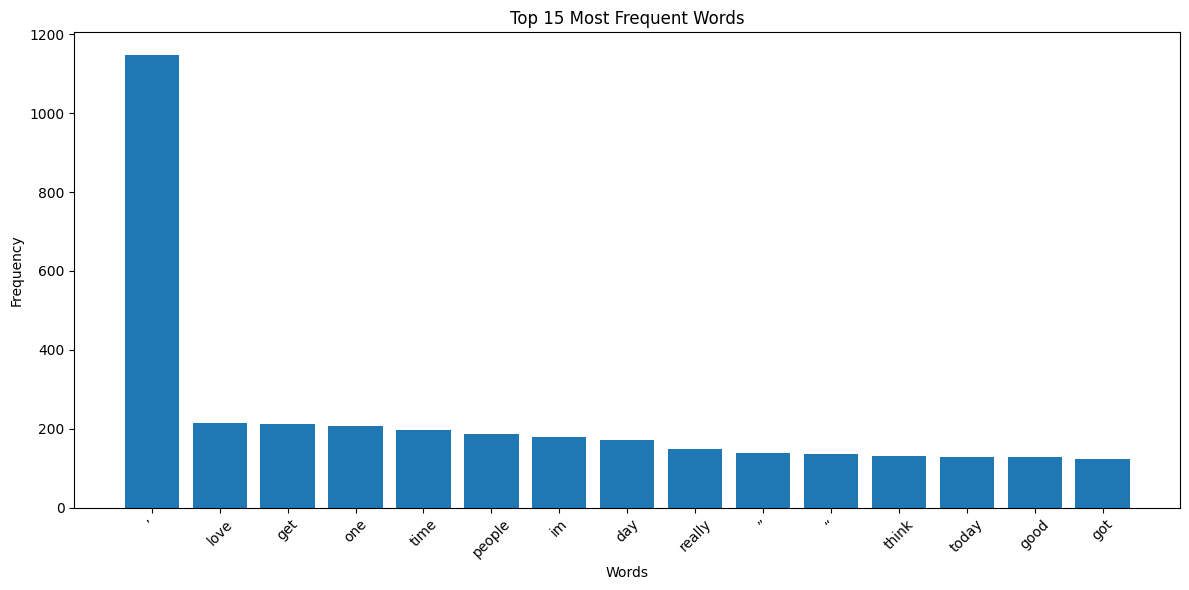

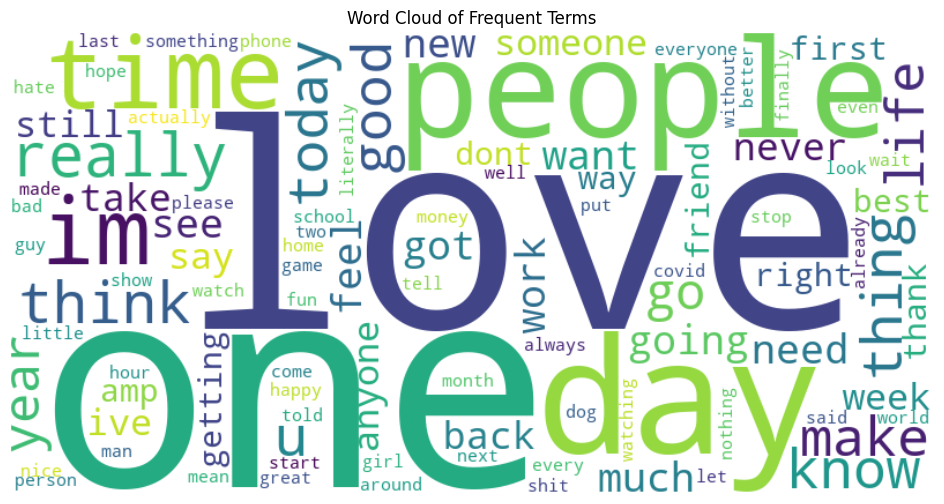

In [205]:
# ========================================================
# PART 5: FREQUENCY ANALYSIS EXPLORATION
# ========================================================

'''
I converted the tokenization to be lowercase, and remove punctuation and numbers. This results in a word graph that is more accurately describing the ideas in the tweets.
'''

# Change the number to see more or fewer top words
top_n = 15  # Number of top words to display

fdist, top_words, top_counts = analyze_frequency(filtered_words, top_n)

print(f"\n--- Word Frequency Analysis ---")
print(f"Top {top_n} most frequent words:")
for word, count in zip(top_words, top_counts):
    print(f"  {word}: {count}")

# Plot frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_counts)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(' '.join(filtered_words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms')
plt.show()

In [206]:
# ========================================================
# PART 6: SENTIMENT ANALYSIS FUNCTION
# ========================================================

# Function to analyze sentiment
def analyze_sentiment(text, by_sentence=False):
    """
    Perform sentiment analysis on text using VADER
    If by_sentence is True, analyze each sentence separately
    """
    # Initialize sentiment analyzer
    sia = SentimentIntensityAnalyzer()
    
    if by_sentence:
        # Analyze each sentence
        sentences = sent_tokenize(text)
        results = []
        
        for sentence in sentences:
            sentiment = sia.polarity_scores(sentence)
            results.append((sentence, sentiment))
        
        return results
    else:
        # Analyze entire text
        sentiment = sia.polarity_scores(text)
        return sentiment

In [ ]:
# ========================================================
# PART 6: SENTIMENT ANALYSIS EXPLORATION
# ========================================================

'''
With it set to be false: 
  Negative: 0.103
  Neutral: 0.717
  Positive: 0.180
  Compound: 1.000
  
  
With it set to be true:
Average compound score: 0.151

Sentiment analysis by sentence:

Sentence 1: The only thing I got from college is a caffeine addiction
I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯
Remember the hundred emails from companies when Covid started getting real?
  Negative: 0.000
  Neutral: 0.818
  Positive: 0.182
  Compound: 0.836

Sentence 2: I’ve gotten three in regards to support for protests.
  Negative: 0.164
  Neutral: 0.603
  Positive: 0.233
  Compound: 0.202

Sentence 3: And only @SavageXFenty shared helpful links and actually said black lives matter... we love capitalism 🥰🙌🏼
Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee
@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.
  Negative: 0.000
  Neutral: 0.769
  Positive: 0.231
  Compound: 0.928

Sentence 4: @jimrossignol I choose to interpret it as "XD": the universal emoticon for laughing at those poor, poor folks in Ubisoft's marketing department who have to deal with that branding until the servers quietly shut down 8 months after launch.
  Negative: 0.143
  Neutral: 0.783
  Positive: 0.074
  Compound: -0.459

Sentence 5: Why would Alexa's recipe for Yorkshire pudding be a bhaji yorkshire pudding ?
  Negative: 0.000
  Neutral: 1.000
  Positive: 0.000
  Compound: 0.000
'''

analyze_by_sentence = False  

sentiment_results = analyze_sentiment(sample_text, analyze_by_sentence)

print(f"\n--- Sentiment Analysis ---")
if analyze_by_sentence:
    print("Sentiment analysis by sentence:")
    for i, (sentence, sentiment) in enumerate(sentiment_results[:5]):  # Show first 5 for brevity
        print(f"\nSentence {i+1}: {sentence}")
        print(f"  Negative: {sentiment['neg']:.3f}")
        print(f"  Neutral: {sentiment['neu']:.3f}")
        print(f"  Positive: {sentiment['pos']:.3f}")
        print(f"  Compound: {sentiment['compound']:.3f}")
    
    # Also show average compound score
    avg_compound = sum(s['compound'] for _, s in sentiment_results) / len(sentiment_results)
    print(f"\nAverage compound score: {avg_compound:.3f}")
else:
    print("Overall sentiment analysis:")
    print(f"  Negative: {sentiment_results['neg']:.3f}")
    print(f"  Neutral: {sentiment_results['neu']:.3f}")
    print(f"  Positive: {sentiment_results['pos']:.3f}")
    print(f"  Compound: {sentiment_results['compound']:.3f}")

<>:5: SyntaxWarning: invalid escape sequence '\_'
<>:5: SyntaxWarning: invalid escape sequence '\_'
C:\Users\Sethc\AppData\Local\Temp\ipykernel_25688\2444266264.py:5: SyntaxWarning: invalid escape sequence '\_'
  '''



--- Sentiment Analysis ---
Overall sentiment analysis:
  Negative: 0.103
  Neutral: 0.717
  Positive: 0.180
  Compound: 1.000
